In [1]:
import utilities
import pandas as pd 
import os

In [2]:
dataset = pd.read_csv("/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/Audio_Ads/Dataset_6hrs.csv")
result_dir = "/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/plots"

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
df_amazon = dataset[dataset['Music app'] == 'Amazon']
df_amazon[['Ad', 'count', 'unique']]
df_bar = df_amazon[['Ad', 'count', 'unique']].groupby('Ad').sum()
df_bar = df_bar.sort_values(by = 'count')

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


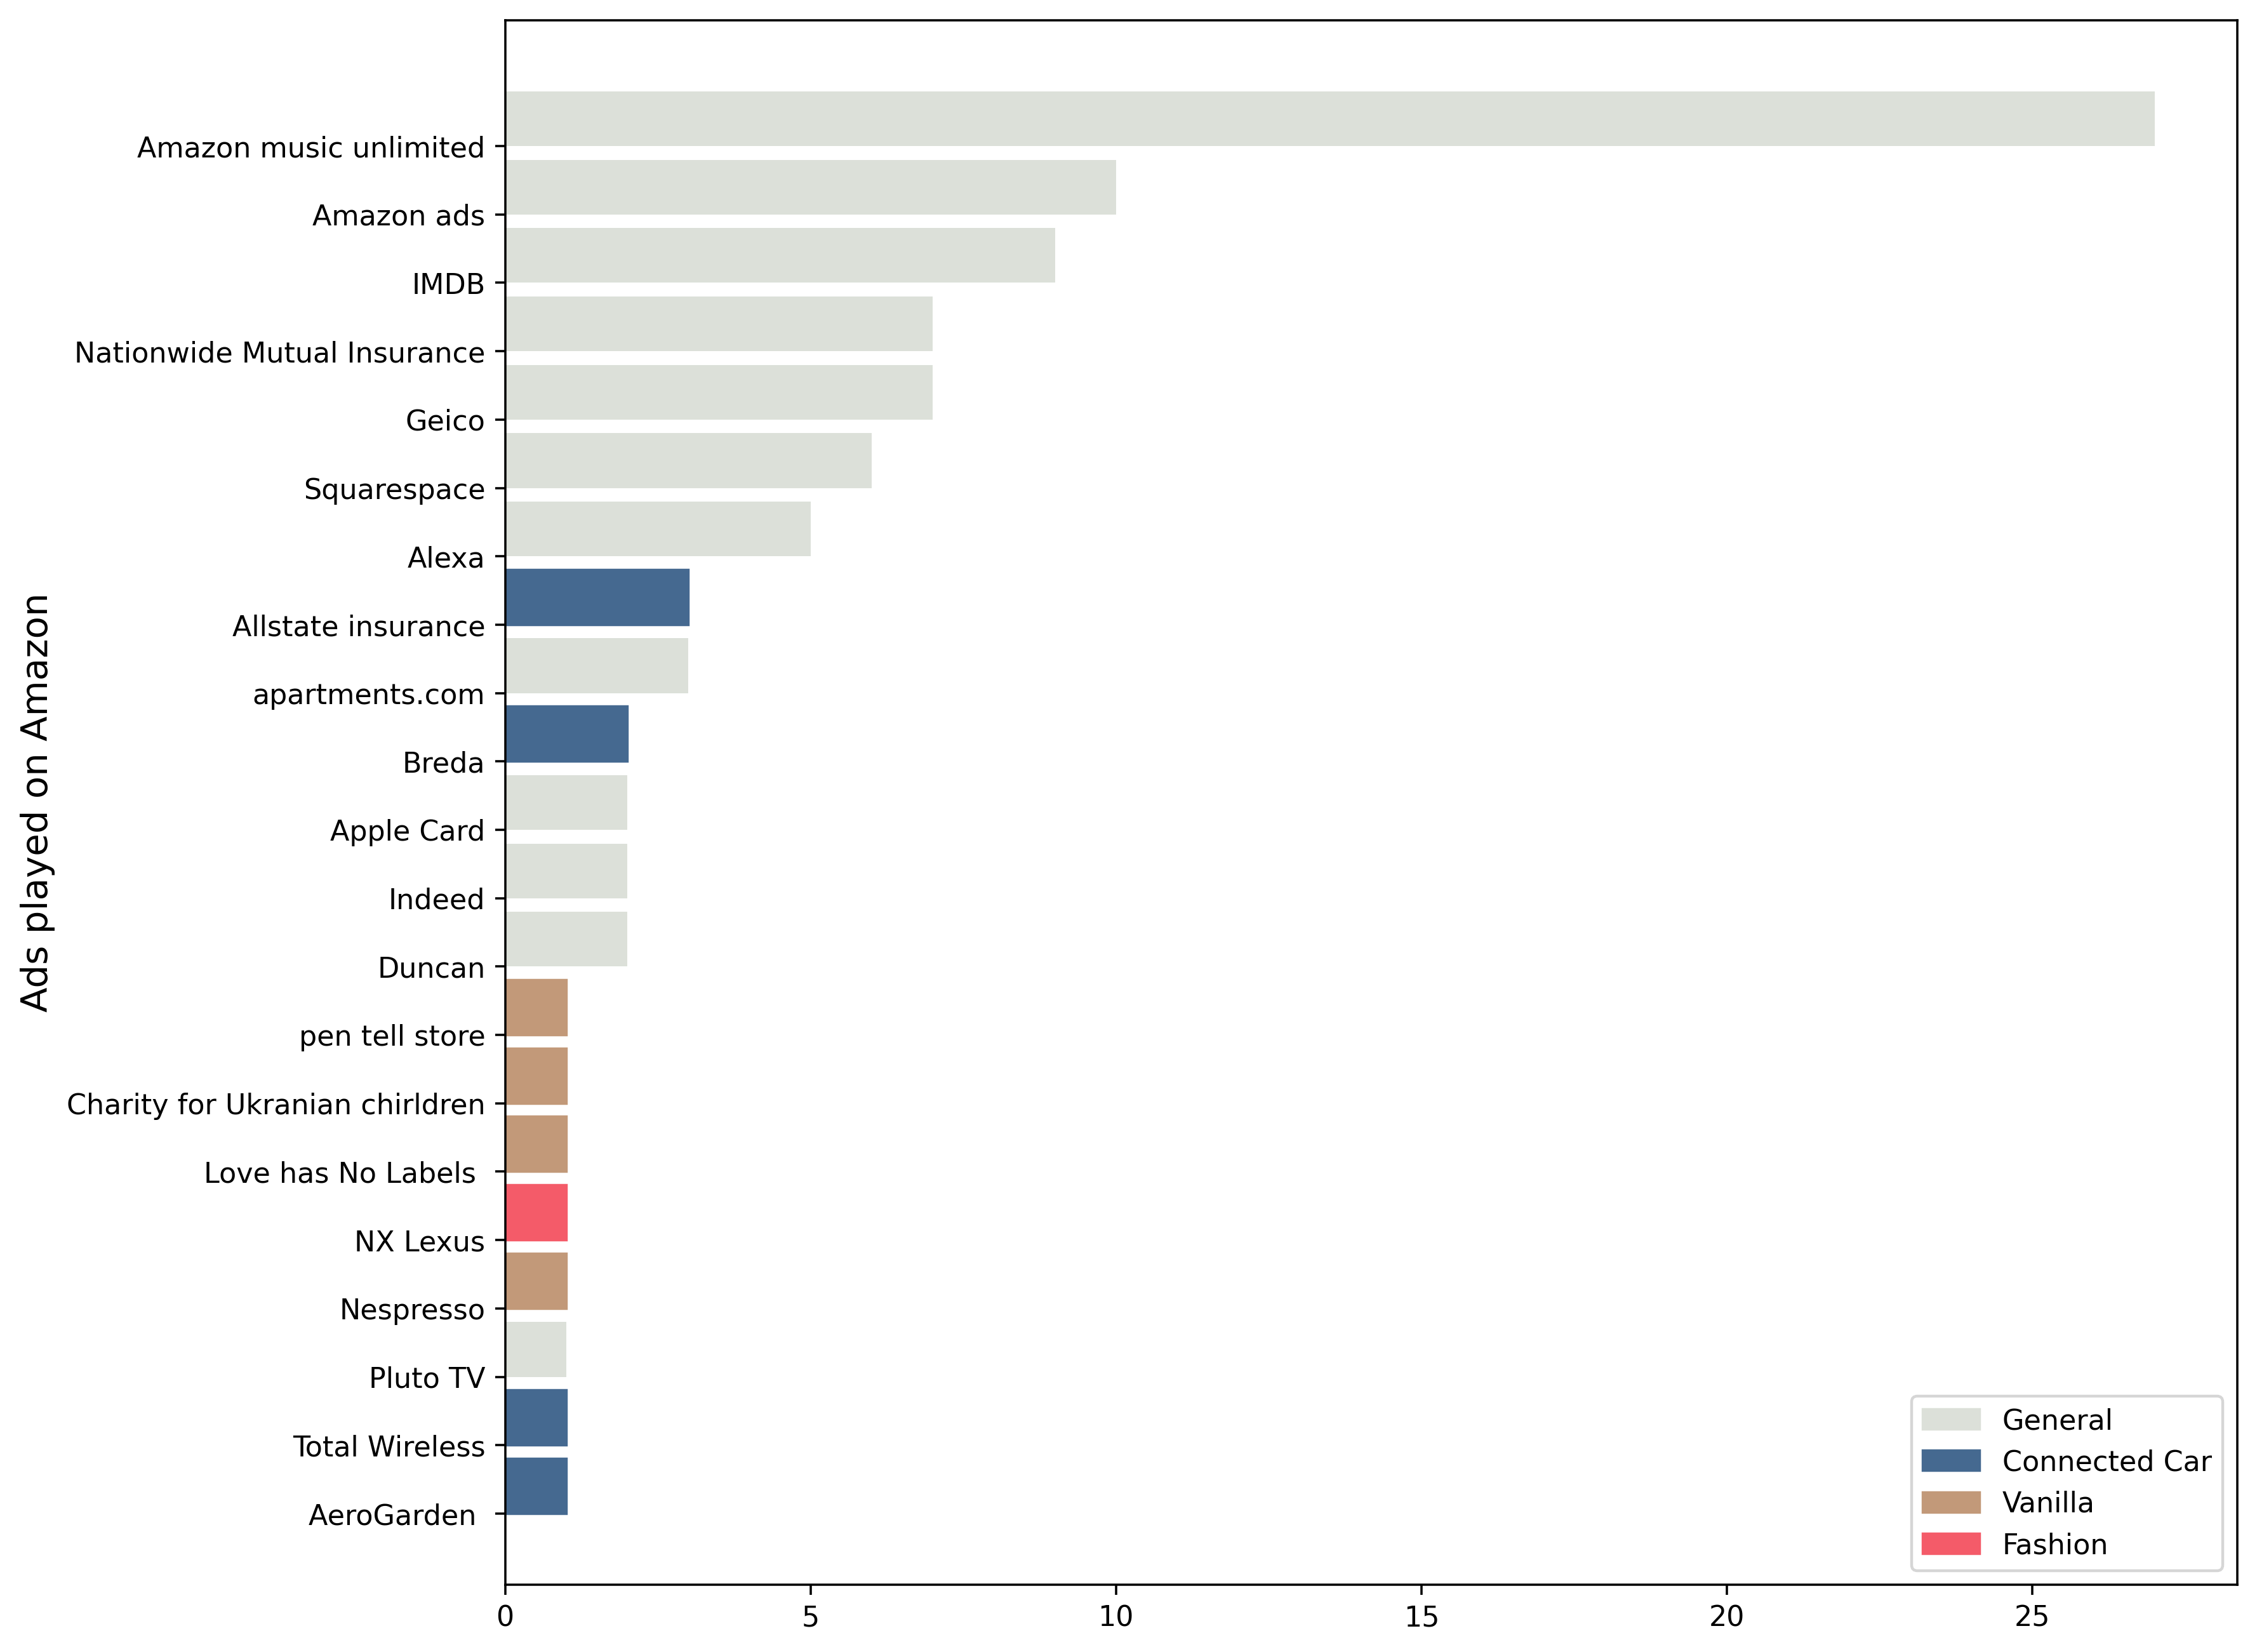

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 12})


# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(11, 10), dpi=320)

# Example data
counts = list(df_bar['count'])
ads = list(df_bar.index)
#error = np.random.rand(len(fqdns))

bar_list = ax.barh(ads, counts, align='edge', color = '#DCE0D9')
for i, ad in enumerate(ads):
    for index, row in dataset.iterrows():
        if row['Ad'] == ad:
            if row['unique'] == 'False':
                break
            if row['unique'] == 'Connected Car':
                bar_list[i].set_color('#456990')
                break
            if row['unique'] == 'Vanilla':
                bar_list[i].set_color('#C29979')
                break
            if row['unique'] == 'Fashion':
                bar_list[i].set_color('#F45B69')
                break
        
ax.set_ylabel('Ads played on Amazon', size=13, fontname="Times New Roman Bold")
colors = {'General' : '#DCE0D9', 'Connected Car': '#456990', 'Vanilla' : '#C29979', 'Fashion' : '#F45B69'}
labels = ['General', 'Connected Car', 'Vanilla', 'Fashion']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.savefig('amazon.png')
plt.show()

In [6]:
df_Spotify = dataset[dataset['Music app'] == 'Spotify']
df_Spotify[['Ad', 'count']]
df_bar = df_Spotify[['Ad', 'count']].groupby('Ad').sum()
df_bar = df_bar.sort_values(by = 'count')

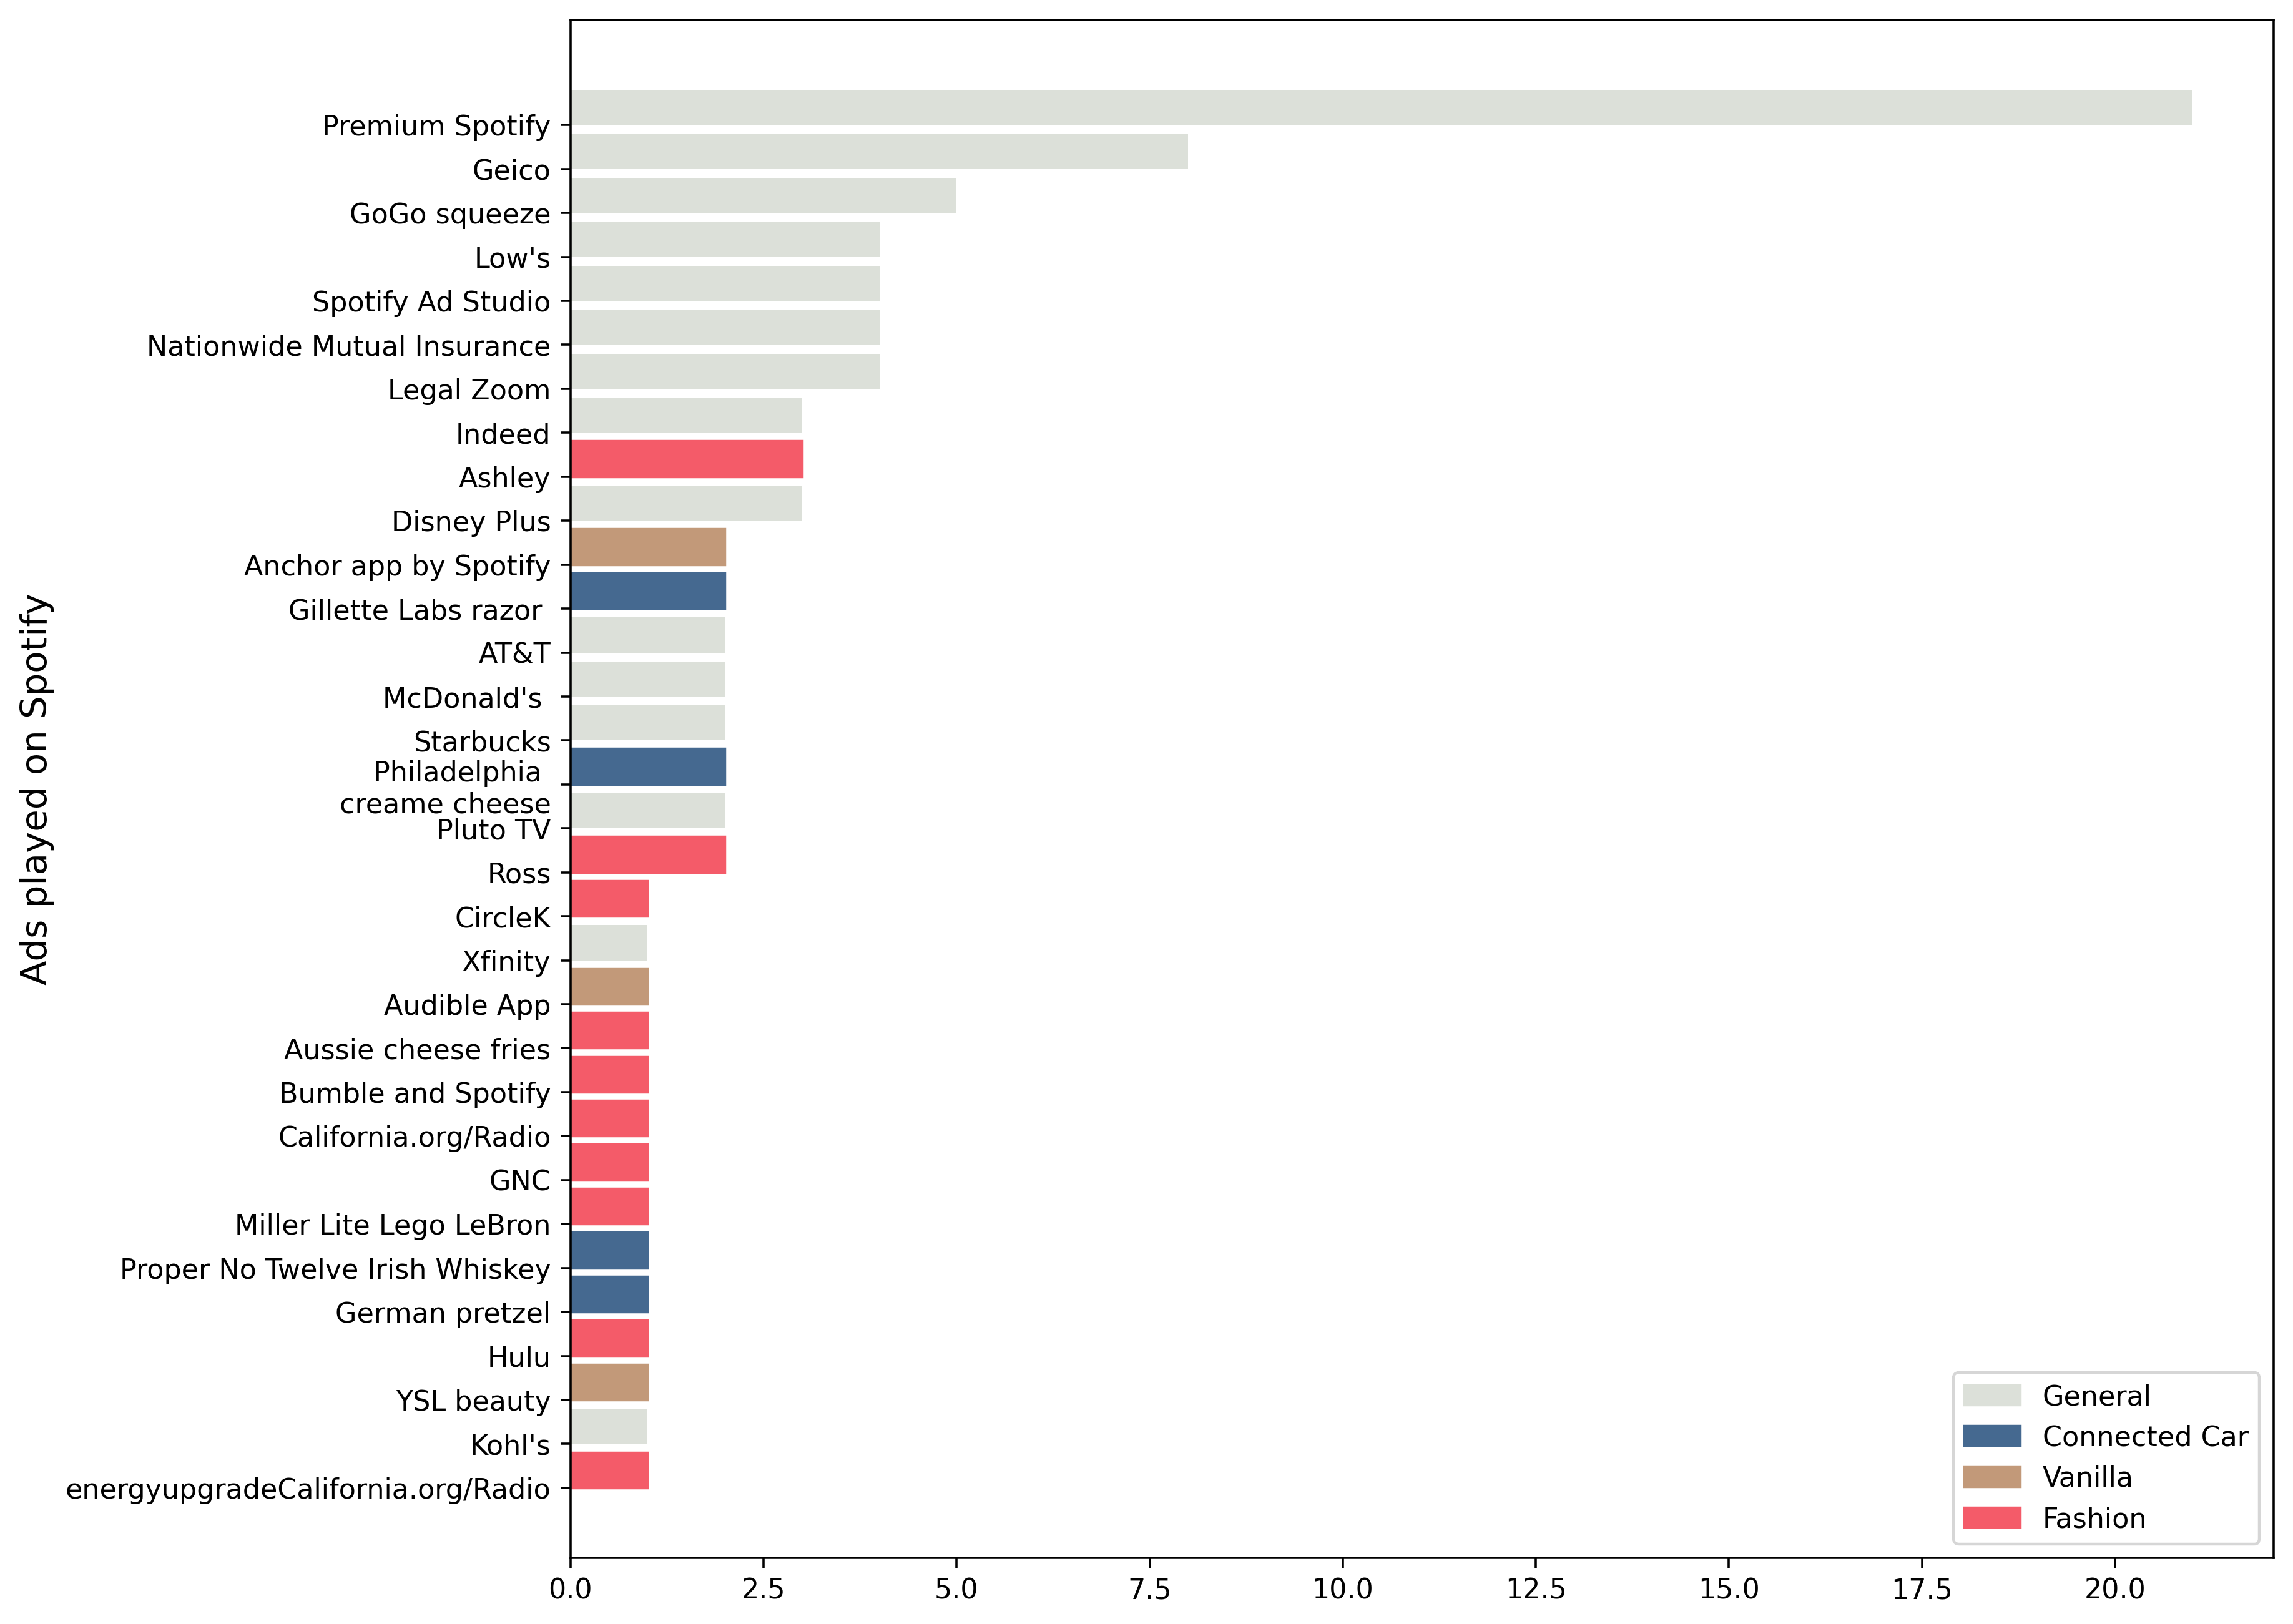

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 12})


# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(11, 10), dpi=320)

# Example data
counts = list(df_bar['count'])
ads = list(df_bar.index)
#error = np.random.rand(len(fqdns))

bar_list = ax.barh(ads, counts, align='edge', color = '#DCE0D9')
for i, ad in enumerate(ads):
    for index, row in dataset.iterrows():
        if row['Ad'] == ad:
            if row['unique'] == 'False':
                break
            if row['unique'] == 'Connected Car':
                bar_list[i].set_color('#456990')
                break
            if row['unique'] == 'Vanilla':
                bar_list[i].set_color('#C29979')
                break
            if row['unique'] == 'Fashion':
                bar_list[i].set_color('#F45B69')
                break
        
ax.set_ylabel('Ads played on Spotify', size=13, fontname="Times New Roman Bold")
colors = {'General' : '#DCE0D9', 'Connected Car': '#456990', 'Vanilla' : '#C29979', 'Fashion' : '#F45B69'}
labels = ['General', 'Connected Car', 'Vanilla', 'Fashion']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.savefig('spotify.png')
plt.show()

In [8]:
df_Pandora = dataset[dataset['Music app'] == 'Pandora']
df_Pandora[['Ad', 'count']]
df_bar = df_Pandora[['Ad', 'count']].groupby('Ad').sum()
df_bar = df_bar.sort_values(by = 'count')

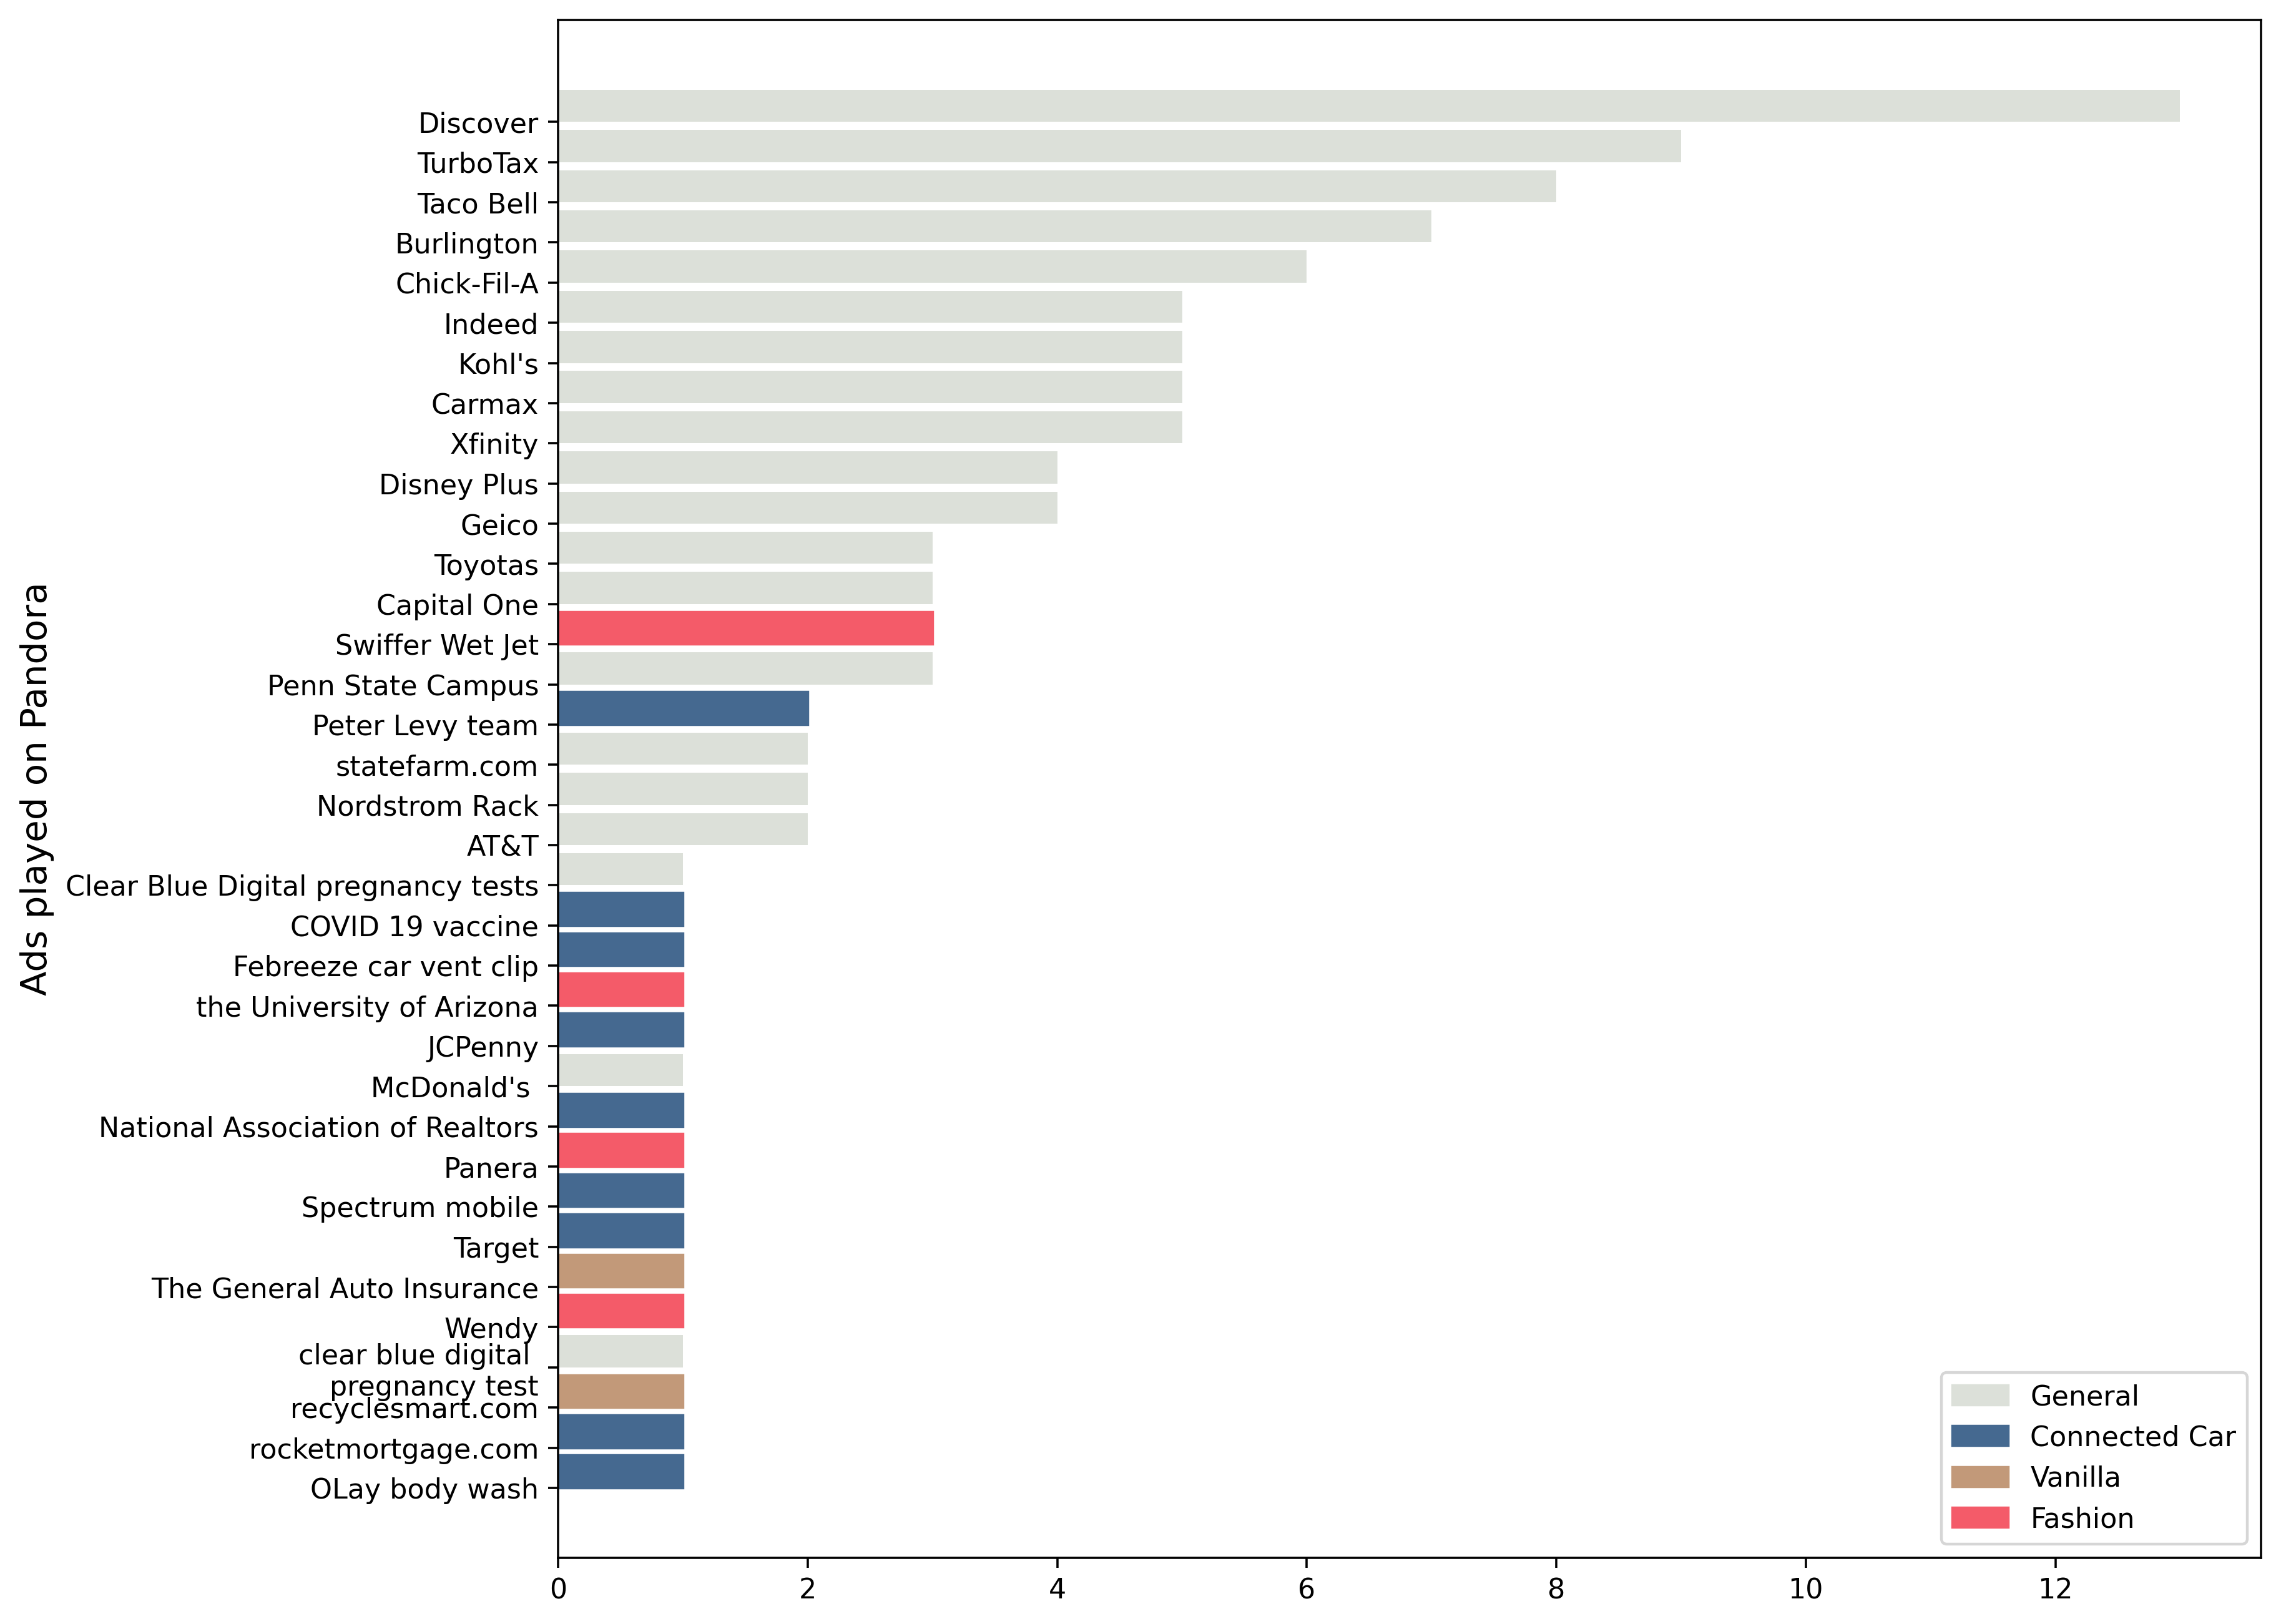

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 12})


# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(11, 10), dpi=320)

# Example data
counts = list(df_bar['count'])
ads = list(df_bar.index)
#error = np.random.rand(len(fqdns))

bar_list = ax.barh(ads, counts, align='edge', color = '#DCE0D9')
for i, ad in enumerate(ads):
    for index, row in dataset.iterrows():
        if row['Ad'] == ad:
            if row['unique'] == 'False':
                break
            if row['unique'] == 'Connected Car':
                bar_list[i].set_color('#456990')
                break
            if row['unique'] == 'Vanilla':
                bar_list[i].set_color('#C29979')
                break
            if row['unique'] == 'Fashion':
                bar_list[i].set_color('#F45B69')
                break
        
ax.set_ylabel('Ads played on Pandora', size=13, fontname="Times New Roman Bold")
colors = {'General' : '#DCE0D9', 'Connected Car': '#456990', 'Vanilla' : '#C29979', 'Fashion' : '#F45B69'}
labels = ['General', 'Connected Car', 'Vanilla', 'Fashion']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.savefig('pandora.png')
plt.show()

## General Ads distribution

In [10]:
dataset_general = dataset[dataset['unique'] == 'FALSE']
dataset_general

,Persona,Music app,Ad,count,unique
1,Vanilla,Amazon,apartments.com,1,FALSE
2,Vanilla,Amazon,Amazon music unlimited,10,FALSE
3,Vanilla,Amazon,Geico,4,FALSE
5,Vanilla,Amazon,Amazon ads,5,FALSE
7,Vanilla,Amazon,Nationwide Mutual Insurance,2,FALSE
...,...,...,...,...,...
140,Fashion,Pandora,TurboTax,3,FALSE
142,Fashion,Pandora,Taco Bell,3,FALSE
144,Fashion,Pandora,Kohl's,3,FALSE
145,Fashion,Pandora,Carmax,2,FALSE


# Brand Distribution accross different Music Apps

In [11]:
dataset_general_amazon = dataset_general[dataset_general['Music app'] == 'Amazon']
general_ads = set()
for index, row in dataset_general_amazon.iterrows():
    general_ads.add(row['Ad'])

In [12]:
df = {}
for ad in general_ads:
    for index, row in dataset_general_amazon.iterrows():
        if ad == row['Ad']:
            if row['Ad'] not in df:
                df[row['Ad']] = {'Vanilla' :0, 'Fashion':0, 'Connected Car':0}
                df[row['Ad']][row['Persona']] = row['count']
            else:
                df[row['Ad']][row['Persona']] += row['count']
                
# sort dataset
for ads, personas in df.items():
    df[ads]['sum'] = sum(personas.values())
df = dict(sorted(df.items(), key = lambda x: x[1]['sum'], reverse=True))

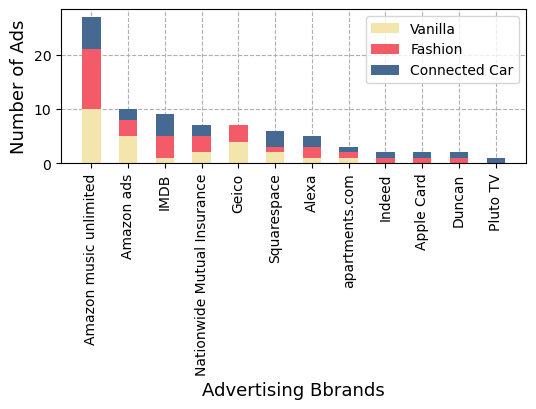

In [13]:
import matplotlib.pyplot as plt

# data
ads = list(df.keys())
Vanilla = np.array([personas['Vanilla'] for ad, personas in df.items()])
Fashion = np.array([personas['Fashion'] for ad, personas in df.items()])
Car = np.array([personas['Connected Car'] for ad, personas in df.items()])

width = 0.5 
fig, ax = plt.subplots(figsize=(6, 2))

ax.bar(ads, Vanilla, width, label='Vanilla', color='#F3E5AB')
ax.bar(ads, Fashion, width, bottom=Vanilla, label='Fashion', color='#F45B69')
ax.bar(ads, Car, width, bottom=Fashion+Vanilla, label='Connected Car', color='#456990')

ax.set_ylabel('Number of Ads', size=13, fontname="Times New Roman Bold")
ax.set_xlabel('Advertising Bbrands', size=13, fontname="Times New Roman Bold")

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
#ax.set_title('Brand distribution across different personas on Amazon App')
title = "Brand_distribution_across_different_personas_on_Amazon_Ap"
ax.legend()
y_pos = range(len(ads))
plt.xticks(y_pos, ads, rotation=90)

plt.grid(linestyle='--')
ax.set_axisbelow(True)
plt.savefig(os.path.join(result_dir, title+ '.png'), bbox_inches='tight')
plt.show()

In [14]:
dataset_general_spotify = dataset_general[dataset_general['Music app'] == 'Spotify']
general_ads = set()
for index, row in dataset_general_spotify.iterrows():
    general_ads.add(row['Ad'])
df = {}
for ad in general_ads:
    for index, row in dataset_general_spotify.iterrows():
        if ad == row['Ad']:
            if row['Ad'] not in df:
                df[row['Ad']] = {'Vanilla' :0, 'Fashion':0, 'Connected Car':0}
                df[row['Ad']][row['Persona']] = row['count']
            else:
                df[row['Ad']][row['Persona']] += row['count']

In [15]:
for ads, personas in df.items():
    df[ads]['sum'] = sum(personas.values())
df = dict(sorted(df.items(), key = lambda x: x[1]['sum'], reverse=True))

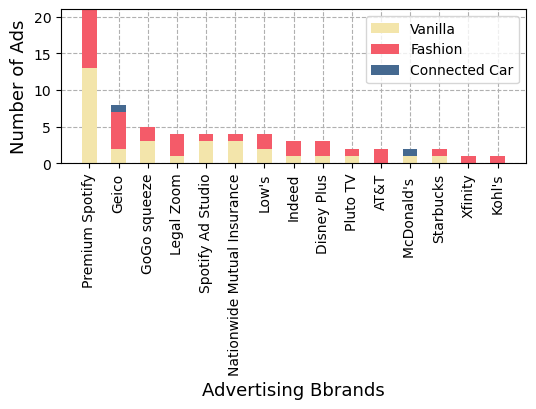

In [16]:
import matplotlib.pyplot as plt

# data
ads = list(df.keys())
Vanilla = np.array([personas['Vanilla'] for ad, personas in df.items()])
Fashion = np.array([personas['Fashion'] for ad, personas in df.items()])
Car = np.array([personas['Connected Car'] for ad, personas in df.items()])

width = 0.5 
fig, ax = plt.subplots(figsize=(6, 2))

ax.bar(ads, Vanilla, width, label='Vanilla', color='#F3E5AB')
ax.bar(ads, Fashion, width, bottom=Vanilla, label='Fashion', color='#F45B69')
ax.bar(ads, Car, width, bottom=Fashion+Vanilla, label='Connected Car', color='#456990')

ax.set_ylabel('Number of Ads', size=13, fontname="Times New Roman Bold")
ax.set_xlabel('Advertising Bbrands', size=13, fontname="Times New Roman Bold")

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
#ax.set_title('Brand distribution across different personas on Amazon App')
title = "Brand_distribution_across_different_personas_on_Spotify"
ax.legend()
y_pos = range(len(ads))
plt.xticks(y_pos, ads, rotation=90)

plt.grid(linestyle='--')
ax.set_axisbelow(True)
plt.savefig(os.path.join(result_dir, title+ '.png'), bbox_inches='tight')
plt.show()

In [17]:
dataset_general_pandora = dataset_general[dataset_general['Music app'] == 'Pandora']
general_ads = set()
for index, row in dataset_general_pandora.iterrows():
    general_ads.add(row['Ad'])
df = {}
for ad in general_ads:
    for index, row in dataset_general_pandora.iterrows():
        if ad == row['Ad']:
            if row['Ad'] not in df:
                df[row['Ad']] = {'Vanilla' :0, 'Fashion':0, 'Connected Car':0}
                df[row['Ad']][row['Persona']] = row['count']
            else:
                df[row['Ad']][row['Persona']] += row['count']
             

In [18]:
for ads, personas in df.items():
    df[ads]['sum'] = sum(personas.values())
df = dict(sorted(df.items(), key = lambda x: x[1]['sum'], reverse=True))


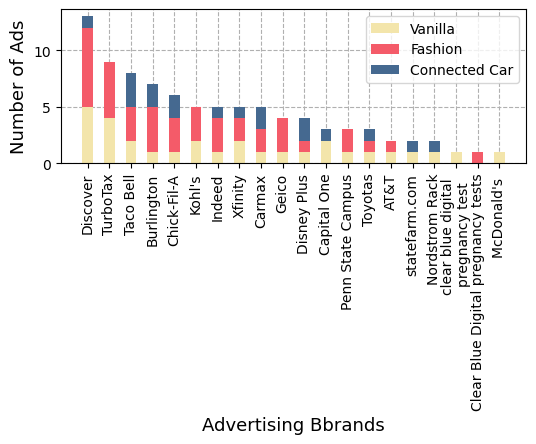

In [19]:
import matplotlib.pyplot as plt

# data
ads = list(df.keys())
Vanilla = np.array([personas['Vanilla'] for ad, personas in df.items()])
Fashion = np.array([personas['Fashion'] for ad, personas in df.items()])
Car = np.array([personas['Connected Car'] for ad, personas in df.items()])

width = 0.5 
fig, ax = plt.subplots(figsize=(6, 2))

ax.bar(ads, Vanilla, width, label='Vanilla', color='#F3E5AB')
ax.bar(ads, Fashion, width, bottom=Vanilla, label='Fashion', color='#F45B69')
ax.bar(ads, Car, width, bottom=Fashion+Vanilla, label='Connected Car', color='#456990')

ax.set_ylabel('Number of Ads', size=13, fontname="Times New Roman Bold")
ax.set_xlabel('Advertising Bbrands', size=13, fontname="Times New Roman Bold")

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
#ax.set_title('Brand distribution across different personas on Amazon App')
title = "Brand_distribution_across_different_personas_on_Pandora"
ax.legend()
y_pos = range(len(ads))
plt.xticks(y_pos, ads, rotation=90)

plt.grid(linestyle='--')
ax.set_axisbelow(True)
plt.savefig(os.path.join(result_dir, title+ '.png'), bbox_inches='tight')
plt.show()